# problem Statement:

# 1. Import Libraries:

In [181]:
# importing libraries 
import pandas as pd 
import re 
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
import contractions
from unidecode import unidecode
from nltk.stem import WordNetLemmatizer
from collections import Counter
from autocorrect import Speller
import matplotlib.pyplot as plt 
import seaborn as sns
from nltk.util import ngrams
import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from langdetect import detect
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


# 2.Data Gathering:

In [182]:
df = pd.read_csv('Restaurant_Reviews.tsv', delimiter='\t')
df=df.rename (columns = {'Liked':'Star'})
df

,Review,Star
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.,1
4,The selection on the menu was great and so were the prices.,1
...,...,...
995,I think food should have flavor and texture and both were lacking.,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go back.,0
998,"The whole experience was underwhelming, and I think we'll just go to Ninja Sushi next time.",0


In [183]:
def lang_detect(df):
    lang = detect(df)
    return lang

In [185]:
df.Review[0]

'Wow... Loved this place.'

In [8]:
#lang_detect(df.Review[0])

In [9]:
#df['language'] = df.Review.apply(lang_detect)
data.language.unique()

In [188]:
stopword_list = stopwords.words("english")
stopword_list.remove('not')
stopword_list.remove('no')
stopword_list.remove('nor')

In [189]:
stopword_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [191]:
# ngrams visualization 
# Unigrams 
def get_ngrams(df,ngrams_range):
    fixed_text = contractions.fix(df)
    tokens = word_tokenize(fixed_text)
    clean_text = [word.lower() for word in tokens if (word not in punctuation) and(word.isalpha()) and(word.lower() not in stopword_list) and (len(word)>2)]
    ngram_list = ngrams(clean_text,ngrams_range)
    return ngram_list

In [192]:
ngram_list = df.Review.apply(lambda x : get_ngrams(x,1))
ngram_list

0      <zip object at 0x000001EC660E5D80>
1      <zip object at 0x000001EC79A1E740>
2      <zip object at 0x000001EC662F5180>
3      <zip object at 0x000001EC798D6D80>
4      <zip object at 0x000001EC799BD380>
                      ...                
995    <zip object at 0x000001EC7B649B00>
996    <zip object at 0x000001EC7B6498C0>
997    <zip object at 0x000001EC7B649E80>
998    <zip object at 0x000001EC7B64A380>
999    <zip object at 0x000001EC7B64AA00>
Name: Review, Length: 1000, dtype: object

In [193]:
final_ngram_list = []
for ngram in ngram_list:
    for val in ngram:
        final_ngram_list.append(val[0])


In [195]:
len(final_ngram_list)

5569

In [196]:
final_ngram_list

['wow',
 'loved',
 'place',
 'crust',
 'not',
 'good',
 'not',
 'tasty',
 'texture',
 'nasty',
 'stopped',
 'late',
 'may',
 'bank',
 'holiday',
 'rick',
 'steve',
 'recommendation',
 'loved',
 'selection',
 'menu',
 'great',
 'prices',
 'getting',
 'angry',
 'want',
 'damn',
 'pho',
 'honeslty',
 'not',
 'taste',
 'fresh',
 'potatoes',
 'like',
 'rubber',
 'could',
 'tell',
 'made',
 'ahead',
 'time',
 'kept',
 'warmer',
 'fries',
 'great',
 'great',
 'touch',
 'service',
 'prompt',
 'would',
 'not',
 'back',
 'cashier',
 'care',
 'ever',
 'say',
 'still',
 'ended',
 'wayyy',
 'overpriced',
 'tried',
 'cape',
 'cod',
 'ravoli',
 'chicken',
 'cranberry',
 'mmmm',
 'disgusted',
 'pretty',
 'sure',
 'human',
 'hair',
 'shocked',
 'signs',
 'indicate',
 'cash',
 'highly',
 'recommended',
 'waitress',
 'little',
 'slow',
 'service',
 'place',
 'not',
 'worth',
 'time',
 'let',
 'alone',
 'vegas',
 'not',
 'like',
 'burrittos',
 'blah',
 'food',
 'amazing',
 'service',
 'also',
 'cute',
 'c

In [198]:
most_common_uni = Counter(final_ngram_list).most_common(100)
most_common_uni

[('not', 218),
 ('food', 125),
 ('place', 106),
 ('good', 95),
 ('service', 83),
 ('great', 70),
 ('back', 61),
 ('like', 46),
 ('time', 42),
 ('would', 41),
 ('really', 36),
 ('best', 30),
 ('ever', 28),
 ('also', 27),
 ('friendly', 27),
 ('never', 26),
 ('one', 26),
 ('restaurant', 25),
 ('nice', 25),
 ('amazing', 24),
 ('delicious', 23),
 ('vegas', 22),
 ('pretty', 20),
 ('came', 20),
 ('experience', 20),
 ('could', 19),
 ('staff', 19),
 ('get', 19),
 ('eat', 19),
 ('minutes', 19),
 ('definitely', 19),
 ('love', 19),
 ('even', 19),
 ('disappointed', 19),
 ('bad', 18),
 ('much', 18),
 ('got', 18),
 ('going', 18),
 ('made', 17),
 ('chicken', 17),
 ('first', 17),
 ('say', 16),
 ('think', 16),
 ('better', 16),
 ('salad', 15),
 ('stars', 15),
 ('always', 15),
 ('way', 15),
 ('well', 15),
 ('pizza', 15),
 ('menu', 14),
 ('fresh', 14),
 ('worst', 14),
 ('ordered', 14),
 ('wait', 14),
 ('steak', 14),
 ('want', 13),
 ('taste', 13),
 ('quality', 13),
 ('server', 13),
 ('went', 13),
 ('times',

In [199]:
# bigram
ngram_list = df.Review.apply(lambda x : get_ngrams(x,2))
final_ngram_list = []
for ngram in ngram_list:
    for val in ngram:
        final_ngram_list.append(" ".join([val[0],val[1]]))
most_common_bi = Counter(final_ngram_list).most_common(100)
most_common_bi

[('not good', 13),
 ('would not', 11),
 ('not back', 10),
 ('great food', 8),
 ('good food', 8),
 ('could not', 7),
 ('going back', 7),
 ('food good', 7),
 ('not like', 6),
 ('great service', 6),
 ('really good', 6),
 ('first time', 6),
 ('great place', 6),
 ('not think', 6),
 ('place not', 5),
 ('food service', 5),
 ('customer service', 5),
 ('food delicious', 5),
 ('not know', 5),
 ('not impressed', 5),
 ('food great', 5),
 ('not recommend', 5),
 ('anytime soon', 5),
 ('not worth', 4),
 ('friendly staff', 4),
 ('feel like', 4),
 ('not want', 4),
 ('bad food', 4),
 ('not much', 4),
 ('not wait', 4),
 ('never ever', 4),
 ('waste time', 4),
 ('come back', 4),
 ('food not', 4),
 ('zero stars', 4),
 ('not going', 4),
 ('not disappointed', 4),
 ('service food', 4),
 ('coming back', 4),
 ('recommend place', 4),
 ('not even', 4),
 ('another minutes', 4),
 ('not tasty', 3),
 ('like place', 3),
 ('good prices', 3),
 ('made feel', 3),
 ('every time', 3),
 ('not enjoy', 3),
 ('went back', 3),
 (

In [142]:
# Trigram
neg_data = df[df.Star==1]
ngram_list = neg_data.Review.apply(lambda x : get_ngrams(x,3))
final_ngram_list = []
for ngram in ngram_list:
    for val in ngram:
        final_ngram_list.append(" ".join([val[0],val[1],val[2]]))
most_common_tri = Counter(final_ngram_list).most_common(100)
most_common_tri
# loopholes in delivery, product quality,payment,broken product

[('come back every', 2),
 ('good things place', 2),
 ('first vegas buffet', 2),
 ('great place eat', 2),
 ('great food great', 2),
 ('food great service', 2),
 ('food good service', 2),
 ('wow loved place', 1),
 ('stopped late may', 1),
 ('late may bank', 1),
 ('may bank holiday', 1),
 ('bank holiday rick', 1),
 ('holiday rick steve', 1),
 ('rick steve recommendation', 1),
 ('steve recommendation loved', 1),
 ('selection menu great', 1),
 ('menu great prices', 1),
 ('tried cape cod', 1),
 ('cape cod ravoli', 1),
 ('cod ravoli chicken', 1),
 ('ravoli chicken cranberry', 1),
 ('chicken cranberry mmmm', 1),
 ('service also cute', 1),
 ('could care less', 1),
 ('care less interior', 1),
 ('less interior beautiful', 1),
 ('right red velvet', 1),
 ('red velvet cake', 1),
 ('velvet cake ohhh', 1),
 ('cake ohhh stuff', 1),
 ('ohhh stuff good', 1),
 ('hole wall great', 1),
 ('wall great mexican', 1),
 ('great mexican street', 1),
 ('mexican street tacos', 1),
 ('street tacos friendly', 1),
 ('t

In [201]:
corpus = []
ps = PorterStemmer()
for i in range(0,1000):
    show = re.sub('[^a-zA-Z]',repl=' ', string=df['Review'][i])
    show = show.lower()
    show = show.split()
    show = [ps.stem(word) for word in show if not word in stopwords.words('english')]
    show = ' '.join(show)
    corpus.append(show)

In [202]:
corpus

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place acc

In [203]:
# wordcloud generation 
def wordcloud(df,column):
    df1 = df[column].str.cat(sep=" ") # dataframe--->string (use tokenization and merge data in a single string )
    
    text = " ".join([word for word in df1.split()])
    wordcloud = WordCloud(width=700,height=500,background_color='white',min_font_size=10).generate(text)
    plt.figure(figsize=(10,16))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

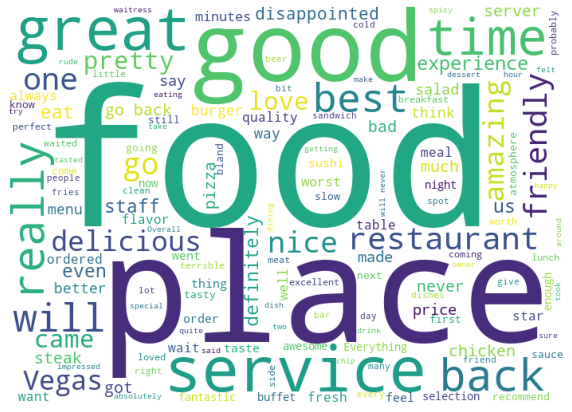

In [204]:
neg_data = df[df.Star==0]
wordcloud(df,'Review')

# Clustering

# Text Vectorization

In [206]:
#1. Count Vectorizer
count_vec = CountVectorizer(stop_words='english',lowercase=True, max_features=1500)
bow = count_vec.fit_transform(corpus)
x_bow = bow.A # toarray,A
pd.DataFrame(x_bow,columns=count_vec.get_feature_names())

,absolut,absolutley,accid,accommod,accomod,accordingli,account,ach,acknowledg,actual,...,yeah,year,yellow,yellowtail,yelper,yucki,yukon,yum,yummi,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [207]:
# 2. Tfidf Vectorizer
tfidf = TfidfVectorizer(stop_words='english',lowercase=True, max_features=1500)
tfidf_val = tfidf.fit_transform(corpus)
x_tfidf = tfidf_val.A # toarray,A
pd.DataFrame(x_tfidf,columns=tfidf.get_feature_names())

,absolut,absolutley,accid,accommod,accomod,accordingli,account,ach,acknowledg,actual,...,yeah,year,yellow,yellowtail,yelper,yucki,yukon,yum,yummi,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [208]:
# 3. word2vec [[w1,w2],[]]
sent = corpus
splitted_sent =[sen.split() for sen in sent ]
word_2_vec_model = Word2Vec(splitted_sent,min_count=2,window=5)
word_2_vec_model.save("word2vec.model")

In [57]:
#sent

In [209]:
def vectorizer(list_of_docs,model):
    """Generate vector for all the reviews 
    list_of_docs = list_of_reviews
    model = word2vec model
    
    return 
    vector for each review"""
    vector_review = []
    for rew in list_of_docs:
        zero_vector = np.zeros(model.vector_size) # if we do not have vector for word or for review
        vectors = []
        for word in rew :
            if word in model.wv: # checking if model have that particular word
                try :
                    vectors.append(model.wv[word]) # array append
                except KeyError:
                    continue
        if vectors:
            vectors = np.asarray(vectors) # converting all arrays into a single array
            avg_vec = vectors.mean(axis=0) # avarage of all vectors(all words)
            vector_review.append(avg_vec)# vector of each review
        else :
            vector_review.append(zero_vector) # if vector of any review is not present we will append zero vector
    return vector_review

In [210]:
vectorized_docs = vectorizer(splitted_sent,word_2_vec_model)

In [211]:
vectorized_docs

[array([-4.5429301e-03,  5.1009464e-03,  3.9632046e-03,  2.5648703e-03,
        -1.0975121e-03, -6.8585868e-03, -5.1420338e-05,  5.1120305e-03,
        -5.7539232e-03, -8.3436677e-03,  3.9492073e-04, -4.1556749e-03,
         4.8557860e-03,  4.3243482e-03,  2.6388087e-03,  4.0765549e-03,
         2.1015496e-04,  6.7092711e-05,  8.1827614e-04, -7.4609690e-03,
        -1.5034721e-03, -1.6563231e-03,  2.8048959e-03, -5.3234152e-03,
        -1.0005912e-03,  4.3006772e-03, -1.0527205e-03, -5.6119484e-04,
         1.9932829e-03,  5.1370026e-03,  3.7617311e-03, -1.3709264e-03,
         4.9167643e-03,  1.8094004e-03, -7.4675429e-04,  6.8922997e-03,
         8.6003711e-04, -4.2999283e-04, -2.5228146e-04,  1.2747187e-04,
        -2.9333480e-04, -1.6351225e-03, -4.3451809e-03,  3.1864010e-03,
        -3.1868147e-03, -3.2925296e-03, -3.7096667e-03, -4.2100889e-03,
        -1.2977492e-03, -1.8036453e-03,  1.2975583e-03, -6.1865449e-03,
        -9.6557051e-04, -8.5163553e-04, -3.9497404e-03,  7.57169

In [212]:
x_emb = np.array(vectorized_docs)
x_emb

array([[-0.00454293,  0.00510095,  0.0039632 , ..., -0.00321438,
        -0.00219461,  0.00057495],
       [-0.00568926, -0.00072128, -0.00525276, ...,  0.00082185,
         0.00543004, -0.00885034],
       [ 0.00192427,  0.00573084,  0.00253562, ..., -0.00244369,
         0.00065924, -0.00186686],
       ...,
       [-0.00500038,  0.00551213, -0.0027817 , ..., -0.00503336,
        -0.00197265, -0.0023399 ],
       [ 0.00131607,  0.00231549,  0.00137008, ..., -0.00707185,
         0.00088002, -0.00072505],
       [-0.0016263 , -0.00107206,  0.00338209, ..., -0.00479177,
         0.00188688, -0.00113988]])

# Kmeans Clustering

In [213]:
def build_kmeans(cluster,x_df):
    kmeans_model = KMeans(n_clusters=cluster)
    y_pred = kmeans_model.fit_predict(x_df)
    return kmeans_model,y_pred

In [214]:
# KMeans-Count 
bow_kmeans,bow_kmeans_pred = build_kmeans(3,x_bow)

In [215]:
# KMeans-tfidf
tfidf_kmeans,tfidf_kmeans_pred = build_kmeans(3,x_tfidf)

In [216]:
# KMeans-word2vec
word2vec_kmeans,word2vec_kmeans_pred = build_kmeans(3,x_emb)

# Evaluation

In [217]:
print(f"Silhouette Score of KMeans_Count  : {silhouette_score(x_bow,bow_kmeans_pred)}")
print(f"Silhouette Score of KMeans_tfidf  : {silhouette_score(x_tfidf,tfidf_kmeans_pred)}")
print(f"Silhouette Score of KMeans_word2vec  : {silhouette_score(x_emb,word2vec_kmeans_pred)}")

Silhouette Score of KMeans_Count  : 0.07178263196725396
Silhouette Score of KMeans_tfidf  : 0.011989692398034445
Silhouette Score of KMeans_word2vec  : 0.04333838234838215


# Visualizer:

In [218]:
def visualizer_silhouette(x_df,model,title1):
    visualizer = SilhouetteVisualizer(model,colors='yellowbrick')
    visualizer.fit(x_df)
    plt.title(f"Silhouette Visualizer with {title1}")

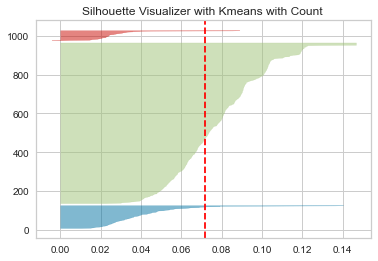

In [219]:
visualizer_silhouette(x_bow,bow_kmeans,"Kmeans with Count ")

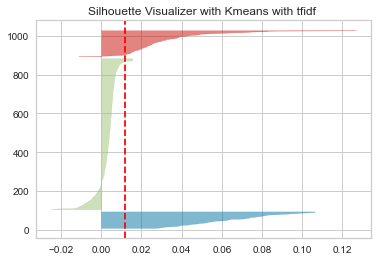

In [220]:
visualizer_silhouette(x_tfidf,tfidf_kmeans,"Kmeans with tfidf ")

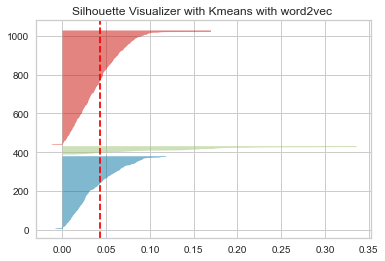

In [221]:
visualizer_silhouette(x_emb,word2vec_kmeans,"Kmeans with word2vec ")

In [222]:
#df['star'].value_counts()

In [223]:
df.Star.unique()

array([1, 0], dtype=int64)

In [224]:
# creating target column with help of other columns 
def create_target_column(df):
    if df==1:
        return "Positive"
    elif df==0:
        return "Negative"
    else:
        pass
   

In [225]:
df["Target"] =df.Star.apply(create_target_column)

In [226]:
df

,Review,Star,Target
0,Wow... Loved this place.,1,Positive
1,Crust is not good.,0,Negative
2,Not tasty and the texture was just nasty.,0,Negative
3,Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.,1,Positive
4,The selection on the menu was great and so were the prices.,1,Positive
...,...,...,...
995,I think food should have flavor and texture and both were lacking.,0,Negative
996,Appetite instantly gone.,0,Negative
997,Overall I was not impressed and would not go back.,0,Negative
998,"The whole experience was underwhelming, and I think we'll just go to Ninja Sushi next time.",0,Negative


In [227]:
df.head(500)

,Review,Star,Target
0,Wow... Loved this place.,1,Positive
1,Crust is not good.,0,Negative
2,Not tasty and the texture was just nasty.,0,Negative
3,Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.,1,Positive
4,The selection on the menu was great and so were the prices.,1,Positive
...,...,...,...
495,And then tragedy struck.,0,Negative
496,The pancake was also really good and pretty large at that.,1,Positive
497,"This was my first crawfish experience, and it was delicious!",1,Positive
498,Their monster chicken fried steak and eggs is my all time favorite.,1,Positive


In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Star    1000 non-null   int64 
 2   Target  1000 non-null   object
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


In [231]:
df['Target'].value_counts()

1    500
0    500
Name: Target, dtype: int64

In [230]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Target']=encoder.fit_transform(df['Target'])

In [232]:
df['Star'].value_counts()

1    500
0    500
Name: Star, dtype: int64

In [233]:
df['Review'].value_counts()

I would not recommend this place.                                                                                                         2
I love this place.                                                                                                                        2
I won't be back.                                                                                                                          2
The food was terrible.                                                                                                                    2
Wow... Loved this place.                                                                                                                  1
                                                                                                                                         ..
The burger... I got the "Gold Standard" a $17 burger and was kind of disappointed.                                                        1
OMG, the food was de

In [177]:
# from sklearn.preprocessing import LabelEncoder
# encoder=LabelEncoder()
# df['Review']=encoder.fit_transform(df['Review'])

# Creating the Bag of Words model

In [234]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)

In [235]:
X = cv.fit_transform(corpus).toarray()
y = df.iloc[:, 1].values

In [236]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [237]:
y

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,

# Creating a pickle file for the CountVectorizer

In [238]:
import pickle
pickle.dump(cv, open('transform.pkl', 'wb'))

# Splitting the Datasedt into Training set and Test set

The train-test split procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model. It is a fast and easy procedure to perform, the results of which allow you to compare the performance of machine learning algorithms for your predictive modeling problem. Although simple to use and interpret, there are times when the procedure should not be used, such as when you have a small dataset and situations where additional configuration is required, such as when it is used for classification and the dataset is not balanced.

In [239]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [240]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0, stratify=y)

In [241]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

800
200
800
200


In [266]:
#from sklearn.naive_bayes import MultinomialNB

In [270]:
# c = MultinomialNB(alpha=0.2)
# c.fit(X_train, y_train)

In [269]:
# c.score(X_test,y_test)

# Model 1: Naive Bayse

Naive Bayes classifiers are a collection of classification algorithms based on Bayes’ Theorem. It is not a single algorithm but a family of algorithms where all of them share a common principle, i.e. every pair of features being classified is independent of each other

# Gausian NB

In [249]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

GaussianNB()

In [250]:
# Evaluation on Testing Data

y_pred = gnb_model.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :",accuracy)

clf_report = classification_report(y_test, y_pred)
print('Classification Report :\n',clf_report)

Confusion Matrix :
 [[58 42]
 [18 82]]
Accuracy : 0.7
Classification Report :
               precision    recall  f1-score   support

           0       0.76      0.58      0.66       100
           1       0.66      0.82      0.73       100

    accuracy                           0.70       200
   macro avg       0.71      0.70      0.70       200
weighted avg       0.71      0.70      0.70       200



In [251]:
# Evaluation on Training Data

y_pred_train = gnb_model.predict(X_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :",accuracy)

clf_report = classification_report(y_train, y_pred_train)
print('Classification Report :\n',clf_report)

Confusion Matrix :
 [[339  61]
 [  0 400]]
Accuracy : 0.92375
Classification Report :
               precision    recall  f1-score   support

           0       1.00      0.85      0.92       400
           1       0.87      1.00      0.93       400

    accuracy                           0.92       800
   macro avg       0.93      0.92      0.92       800
weighted avg       0.93      0.92      0.92       800



# 2. MultinomialNB

In [273]:
mnb_model = MultinomialNB(alpha=0.1)
mnb_model.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

In [274]:
# Evaluation on Testing Data

y_pred = mnb_model.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :",accuracy)

clf_report = classification_report(y_test, y_pred)
print('Classification Report :\n',clf_report)

Confusion Matrix :
 [[78 22]
 [20 80]]
Accuracy : 0.79
Classification Report :
               precision    recall  f1-score   support

           0       0.80      0.78      0.79       100
           1       0.78      0.80      0.79       100

    accuracy                           0.79       200
   macro avg       0.79      0.79      0.79       200
weighted avg       0.79      0.79      0.79       200



In [275]:
# Evaluation on Training Data

y_pred_train = mnb_model.predict(X_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :",accuracy)

clf_report = classification_report(y_train, y_pred_train)
print('Classification Report :\n',clf_report)

Confusion Matrix :
 [[386  14]
 [ 20 380]]
Accuracy : 0.9575
Classification Report :
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       400
           1       0.96      0.95      0.96       400

    accuracy                           0.96       800
   macro avg       0.96      0.96      0.96       800
weighted avg       0.96      0.96      0.96       800



# 3. BernoulliNB

In [255]:
bnb_model = BernoulliNB()
bnb_model.fit(X_train, y_train)

BernoulliNB()

In [256]:
# Evaluation on Testing Data

y_pred = bnb_model.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :",accuracy)

clf_report = classification_report(y_test, y_pred)
print('Classification Report :\n',clf_report)

Confusion Matrix :
 [[76 24]
 [20 80]]
Accuracy : 0.78
Classification Report :
               precision    recall  f1-score   support

           0       0.79      0.76      0.78       100
           1       0.77      0.80      0.78       100

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.78       200
weighted avg       0.78      0.78      0.78       200



In [257]:
# Evaluation on Training Data

y_pred_train = bnb_model.predict(X_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :",accuracy)

clf_report = classification_report(y_train, y_pred_train)
print('Classification Report :\n',clf_report)

Confusion Matrix :
 [[374  26]
 [ 29 371]]
Accuracy : 0.93125
Classification Report :
               precision    recall  f1-score   support

           0       0.93      0.94      0.93       400
           1       0.93      0.93      0.93       400

    accuracy                           0.93       800
   macro avg       0.93      0.93      0.93       800
weighted avg       0.93      0.93      0.93       800



# Model 2: Support Vector Machin

In [258]:
svm_clf = SVC()
svm_clf.fit(X_train, y_train)

SVC()

# Evaluation

In [259]:
#evation on testing data
y_pred = svm_clf.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*80)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy :',accuracy)

print("*"*80)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[92  8]
 [38 62]]
********************************************************************************
Accuracy : 0.77
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.71      0.92      0.80       100
           1       0.89      0.62      0.73       100

    accuracy                           0.77       200
   macro avg       0.80      0.77      0.76       200
weighted avg       0.80      0.77      0.76       200



In [260]:
#evaluation on training data
y_pred_train = svm_clf.predict(X_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*80)

accuracy = accuracy_score(y_train, y_pred_train)
print('Accuracy :',accuracy)

print("*"*80)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[390  10]
 [ 21 379]]
********************************************************************************
Accuracy : 0.96125
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       400
           1       0.97      0.95      0.96       400

    accuracy                           0.96       800
   macro avg       0.96      0.96      0.96       800
weighted avg       0.96      0.96      0.96       800



# Hyperparameter Tuning

In [262]:
svm_clf = SVC()

hyperparameters = {
    "C" : np.arange(1,100),
    "kernel" : ['linear', 'poly', 'rbf', 'sigmoid']
                    }
gscv_svm_clf = GridSearchCV(svm_clf,hyperparameters ,cv = 5)
gscv_svm_clf.fit(X_train, y_train)
gscv_svm_clf.best_estimator_

SVC(C=3)

# Evaluation after Hyperparameter Tuning

In [263]:
svm_clf = SVC(kernel='poly',degree=2)
svm_clf.fit(X_train, y_train)

SVC(degree=2, kernel='poly')

# Model Evaluation after Tuning

In [264]:
#evaluation on test data
y_pred = svm_clf.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*80)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy :',accuracy)

print("*"*80)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[87 13]
 [29 71]]
********************************************************************************
Accuracy : 0.79
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.75      0.87      0.81       100
           1       0.85      0.71      0.77       100

    accuracy                           0.79       200
   macro avg       0.80      0.79      0.79       200
weighted avg       0.80      0.79      0.79       200



In [265]:
#evaluation on train data
y_pred_train = svm_clf.predict(X_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*80)

accuracy = accuracy_score(y_train, y_pred_train)
print('Accuracy :',accuracy)

print("*"*80)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[392   8]
 [ 17 383]]
********************************************************************************
Accuracy : 0.96875
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       400
           1       0.98      0.96      0.97       400

    accuracy                           0.97       800
   macro avg       0.97      0.97      0.97       800
weighted avg       0.97      0.97      0.97       800



In [277]:
pickle.dump(mnb_model, open(' restaurant_review.pkl', 'wb'))